<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

<b>Presentado por:</b> E. DANIEL VALENCIA MARTINEZ  <br>
<b>Fecha:</b> 05/05/2023

## Importación de librerias necesarias

In [226]:
#Para esta actividad se importarán las siguientes librerías:
from IPython.display import Image
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

## Cargar el Dataset

In [70]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'


In [73]:
#dataset = read_csv('Laboratorio_dataset_car.csv')
dataset = read_csv(url,delimiter=';')
dataset

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,low,low,5more,more,med,high,vgood
1746,low,low,5more,more,med,high,vgood
1747,low,low,5more,more,big,low,unacc
1748,low,low,5more,more,big,med,good


## Explique el problema a resolver. 

Unos de los elementos importante es la lectura del CSV por que mediante la URL no se visualizar en diferentes columnas del dataset.

Las variables utilizadas son Buying, Maintenance, Doors, Person, lug_boot y safety con son de entrada en la cual debemos convertirlas en valores numericos multiclases con la función LabelEncoder. Esto no ayudara a proceder a un mejor clasificación.

In [5]:
print(dataset.shape)

(1750, 7)


In [6]:
print(dataset.head())

  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc


In [7]:
print(dataset.describe())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [9]:
print(dataset.dtypes)

Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
class          object
dtype: object


## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


<H4>Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.</H4>

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


<H4>Número de instancias en total</H4>

In [12]:
print(dataset.shape)

(1750, 7)


<H4>Número de instancias pertenecientes por cada clase</H4>

In [94]:
dataset.groupby('class').size()

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64

<h4>Número de atributos de entrada, su significado y tipo.</h4>

In [16]:
dataset.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


In [19]:
dataset

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,low,low,5more,more,med,high,vgood
1746,low,low,5more,more,med,high,vgood
1747,low,low,5more,more,big,low,unacc
1748,low,low,5more,more,big,med,good


<b>Explicación:</b> <br>
<p style="text-align:justify">La exploración del dataset nos ha permitido conocer algunas características importantes de los datos. Por ejemplo, hemos determinado que existen 6 variables de entrada en el conjunto de datos y que la variable de salida, también conocida como la clase, tiene 4 posibles valores: "acc", "good", "unacc" y "vgood". Además, hemos identificado que hay un total de 1750 instancias en el dataset y que la variable de clase es de tipo objeto. </p>
<p style="text-align:justify">
Con esta información, podemos comenzar a pensar en diferentes estrategias para analizar los datos y construir un modelo predictivo. Por ejemplo, podríamos utilizar técnicas de visualización para entender mejor la distribución de los datos o aplicar técnicas de preprocesamiento para preparar los datos para su uso en modelos de aprendizaje automático. También podemos explorar las relaciones entre las diferentes variables de entrada y la variable de salida para identificar patrones que puedan ser útiles en el modelado. En resumen, la exploración de los datos es una parte crítica del proceso de análisis y modelado de datos, y nos proporciona información valiosa para tomar decisiones informadas sobre cómo proceder.</p>

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [101]:
le = LabelEncoder()
dataset['Buying'] = le.fit_transform(dataset['Buying'])
dataset['Maintenance'] = le.fit_transform(dataset['Maintenance'])
dataset['Doors'] = le.fit_transform(dataset['Doors'])
dataset['Person'] = le.fit_transform(dataset['Person'])
dataset['lug_boot'] = le.fit_transform(dataset['lug_boot'])
dataset['safety'] = le.fit_transform(dataset['safety'])

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   int32 
 1   Maintenance  1750 non-null   int32 
 2   Doors        1750 non-null   int32 
 3   Person       1750 non-null   int32 
 4   lug_boot     1750 non-null   int32 
 5   safety       1750 non-null   int32 
 6   class        1750 non-null   object
dtypes: int32(6), object(1)
memory usage: 54.8+ KB


In [103]:
dataset

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1745,1,1,3,2,1,0,vgood
1746,1,1,3,2,1,0,vgood
1747,1,1,3,2,0,1,unacc
1748,1,1,3,2,0,2,good


In [284]:
print(dataset.groupby('class').size())

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64


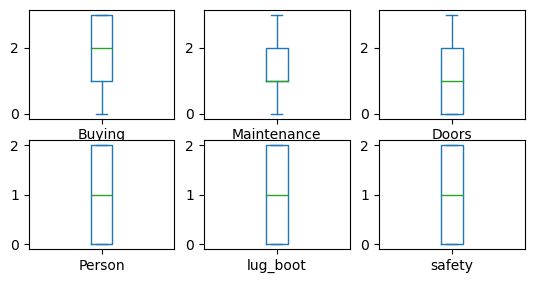

In [24]:
dataset.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
pyplot.show()

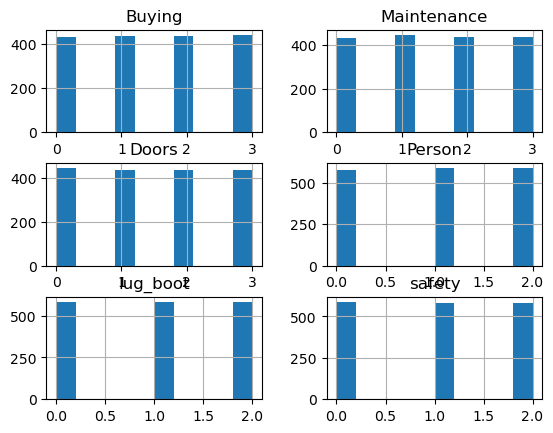

In [25]:
dataset.hist()
pyplot.show()

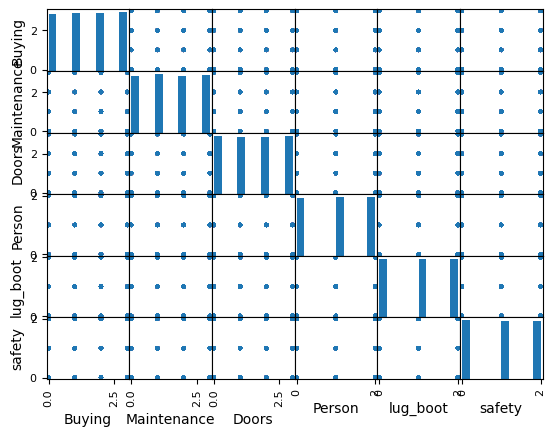

In [26]:
scatter_matrix(dataset)
pyplot.show()

## División del dataset en datos de entrenamiento y datos de test 

In [287]:
array = dataset.values
X = array[:,0:6]
y = array[:, 6]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

<p style="text-align:justify"><b>DecisionTreeClassifier</b>
<br></p>


In [288]:
rule_model = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=42)
rule_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [289]:
Y_predDTC = rule_model.predict(X_test)

<p style="text-align:justify"><b>RandomForestClassifier</b> </p>

In [260]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [290]:
#Ajuste del arbol de decisiones
y_predAD = rf_model.predict(X_test)
accAD = accuracy_score(Y_test, y_predAD)
cmAD = confusion_matrix(Y_test, y_predAD)

In [291]:
#Ajuste de Reglas
y_predAD = rf_model.predict(X_test)
accR = accuracy_score(Y_test, y_predR)
cmR = confusion_matrix(Y_test, y_predR)

In [292]:
#Ajuste del Ensemble learning
y_predEL = rfc.predict(X_test)

accEL = accuracy_score(Y_test, y_pred)
cmEL = confusion_matrix(Y_test, y_pred)

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


Construya un párrafo con los principales hallazgos.

In [271]:
correct = 0
for i in range(len(Y_test)):
    if Y_train[i] == Y_test[i]:
        correct += 1

print(f"Instancias clasificadas correctamente: {correct}/{len(Y_test)}")

Instancias clasificadas correctamente: 185/350


In [272]:

correct = 0
for i in range(len(Y_test)):
    if Y_train[i] != Y_test[i]:
        correct += 1

print(f"Instancias clasificadas incorrectamente: {correct}/{len(Y_test)}")

Instancias clasificadas incorrectamente: 165/350


In [277]:
#TP Rate
tp_rate = metrics.recall_score(Y_train, Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1400, 350]

In [273]:
tn, fp, fn, tp = confusion_matrix(Y_train, Y_test).ravel()
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)

ValueError: Found input variables with inconsistent numbers of samples: [1400, 350]

In [276]:
print(confusion_matrix(Y_test, predictions))

[[ 73   4   0   0]
 [  1  17   0   0]
 [  0   1 244   0]
 [  0   0   0  10]]


<b>Construya un párrafo con los principales hallazgos.</b>

Cuando realizamos cada una de las 

## Comparación del desempeño de modelos

<p style="text-align:justify"><b>DecisionTreeClassifier</b>
</p>


In [240]:
print(classification_report(Y_test, Y_predDTC))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00        77
        good       0.00      0.00      0.00        18
       unacc       0.70      1.00      0.82       245
       vgood       0.00      0.00      0.00        10

    accuracy                           0.70       350
   macro avg       0.17      0.25      0.21       350
weighted avg       0.49      0.70      0.58       350



C:\Users\Edxniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Edxniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Edxniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p style="text-align:justify"><b>RandomForestClassifier</b> </p>

In [293]:
print('Árbol de decisión:')
print('Precisión: {:.2f}%'.format(accAD*100))
print('Matriz de confusión:')
print(cmAD)
print(classification_report(Y_test, y_predAD))

Árbol de decisión:
Precisión: 98.00%
Matriz de confusión:
[[ 72   3   1   1]
 [  0  18   0   0]
 [  2   0 243   0]
 [  0   0   0  10]]
              precision    recall  f1-score   support

         acc       0.97      0.94      0.95        77
        good       0.86      1.00      0.92        18
       unacc       1.00      0.99      0.99       245
       vgood       0.91      1.00      0.95        10

    accuracy                           0.98       350
   macro avg       0.93      0.98      0.96       350
weighted avg       0.98      0.98      0.98       350



In [294]:
print('Reglas:')
print('Precisión: {:.2f}%'.format(accR*100))
print('Matriz de confusión:')
print(cmR)

print(classification_report(Y_test, y_predR))

Reglas:
Precisión: 98.29%
Matriz de confusión:
[[ 73   3   1   0]
 [  0  18   0   0]
 [  1   1 243   0]
 [  0   0   0  10]]
              precision    recall  f1-score   support

         acc       0.99      0.95      0.97        77
        good       0.82      1.00      0.90        18
       unacc       1.00      0.99      0.99       245
       vgood       1.00      1.00      1.00        10

    accuracy                           0.98       350
   macro avg       0.95      0.98      0.97       350
weighted avg       0.98      0.98      0.98       350



In [295]:
print('Ensemble learning:')
print('Precisión del modelo: {:.2f}%'.format(acc*100))
print('Matriz de confusión:')
print(cmEL)
print(classification_report(Y_test, y_predEL))

Ensemble learning:
Precisión del modelo: 98.57%
Matriz de confusión:
[[ 77   0   0   0]
 [  0  18   0   0]
 [  0   0 245   0]
 [  0   0   0  10]]
              precision    recall  f1-score   support

         acc       0.99      0.96      0.97        77
        good       0.94      0.94      0.94        18
       unacc       1.00      1.00      1.00       245
       vgood       0.82      0.90      0.86        10

    accuracy                           0.99       350
   macro avg       0.94      0.95      0.94       350
weighted avg       0.99      0.99      0.99       350



In [297]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         acc       0.99      0.95      0.97        77
        good       0.77      0.94      0.85        18
       unacc       1.00      1.00      1.00       245
       vgood       1.00      1.00      1.00        10

    accuracy                           0.98       350
   macro avg       0.94      0.97      0.95       350
weighted avg       0.99      0.98      0.98       350



El modelo muestra un desempeño muy bueno en general, con una alta precisión, recall y F1-score para la mayoría de las clases, aunque tiene algunas dificultades en la clasificación de la clase "good". Este hallazgo sugiere que se podría mejorar el modelo si se recolecta más datos de entrenamiento para la clase "good" y se ajustan los hiperparámetros del modelo para mejorar su capacidad de clasificar correctamente estas instancias.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

<p style="text-align:justify">Los resultados obtenidos indican que el modelo tiene un rendimiento general muy bueno, con una precisión global del 98%. La mayoría de las clases tienen un rendimiento cercano al 100%, con excepción de la clase "good" que tiene una precisión del 77%, lo que sugiere que hay espacio para mejoras en la capacidad del modelo para detectar instancias de esta clase.</p>

<p style="text-align:justify">En términos de métricas de recall y F1-score, la clase "good" es la que tiene un peor desempeño, con un recall del 94% pero un F1-score del 85%. Esto sugiere que el modelo tiene dificultades para clasificar correctamente algunas instancias de esta clase. Una posible razón para esto podría ser el desbalanceo de clases, es decir, que hay menos ejemplos de la clase "good" en el conjunto de datos, lo que dificulta que el modelo aprenda a clasificar correctamente esta clase. En este caso, se podría considerar la aplicación de técnicas de balanceo de clases, como la sobremuestreo de la clase minoritaria "good", para mejorar el rendimiento del modelo en esta clase.</p>

<p style="text-align:justify">Para mejorar los resultados del modelo, se pueden considerar las siguientes opciones.</p>

<p style="text-align:justify">
- Aumentar el tamaño del conjunto de datos, especialmente en la clase "good", para mejorar la capacidad del modelo para detectar instancias de esta clase. <br>
- Utilizar técnicas de balanceo de clases, como el sobremuestreo de la clase minoritaria "good", para mejorar el rendimiento del modelo en esta clase.<br>
- Ajustar los parámetros del modelo, por ejemplo, la profundidad del árbol de decisión o el número de árboles en el ensemble learning, para mejorar su capacidad de clasificación.</p>